In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# قراءة كل الشيتات
all_sheets = pd.read_excel("/content/Healthcare Provide Dataset.xlsx", sheet_name=None)
df = pd.concat(all_sheets, names=["SheetName"]).reset_index(level=0).rename(columns={"level_0": "SheetName"})


In [ ]:
df.head()

,SheetName,Date of Visit,Patient ID,Provider ID,Department ID,Diagnosis ID,Procedure ID,Insurance ID,Service Type,Treatment Cost,...,Age,Image,Procedure,City ID,Race,Insurance Provider,Diagnosis,Department,City,State
0,visits,2025-04-09,1.0,1.0,4.0,3.0,2.0,2.0,Outpatient,127.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,visits,2024-06-23,2.0,5.0,2.0,2.0,4.0,1.0,Emergency,624.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,visits,2025-02-07,3.0,5.0,3.0,2.0,4.0,2.0,Emergency,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,visits,2024-09-15,4.0,3.0,1.0,4.0,1.0,3.0,Outpatient,234.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,visits,2024-04-15,5.0,5.0,1.0,2.0,2.0,3.0,Outpatient,621.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df.describe())

                    Date of Visit   Patient ID  Provider ID  Department ID  \
count                        5000  9973.000000  5005.000000     5005.00000   
mean   2024-09-13 17:36:57.600000  2487.309435     3.288511        2.74985   
min           2024-01-01 00:00:00     1.000000     1.000000        1.00000   
25%           2024-05-04 18:00:00  1244.000000     1.000000        1.00000   
50%           2024-09-06 12:00:00  2488.000000     4.000000        3.00000   
75%           2025-01-09 06:00:00  3731.000000     5.000000        4.00000   
max           2025-05-14 00:00:00  4973.000000     5.000000        5.00000   
std                           NaN  1435.475035     1.662188        1.40064   

       Diagnosis ID  Procedure ID  Insurance ID  Treatment Cost  \
count   5005.000000   5005.000000   5003.000000     5000.000000   
mean       3.008991      3.272727      1.994004      526.081200   
min        1.000000      1.000000      1.000000       50.000000   
25%        2.000000      2.00

In [ ]:
avg_cost = df.groupby("Service Type")["Treatment Cost"].mean()
avg_cost

,Treatment Cost
Service Type,
Emergency,519.000810
Inpatient,534.368675
Outpatient,525.456746


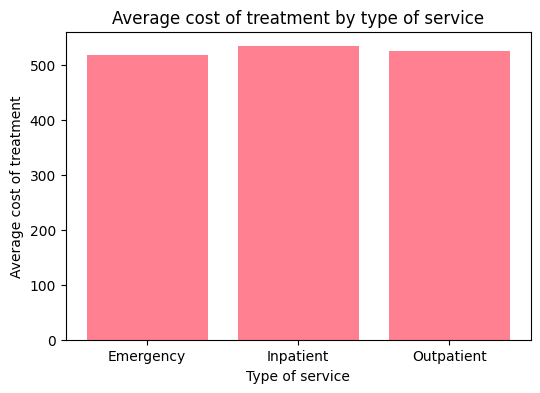

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(avg_cost.index, avg_cost.values, color="#FF8091")
plt.title("Average cost of treatment by type of service")
plt.xlabel("Type of service")
plt.ylabel("Average cost of treatment")
plt.show()


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
print("Departments columns:", department_df.columns.tolist())
print("Insurance columns:", insurance_coverage_df.columns.tolist())


Departments columns: ['Department ID', 'Department']
Insurance columns: ['Insurance ID', 'Insurance Provider']


/tmp/ipython-input-2918958848.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_coverage, x="Department", y="Insurance Coverage", palette="coolwarm")


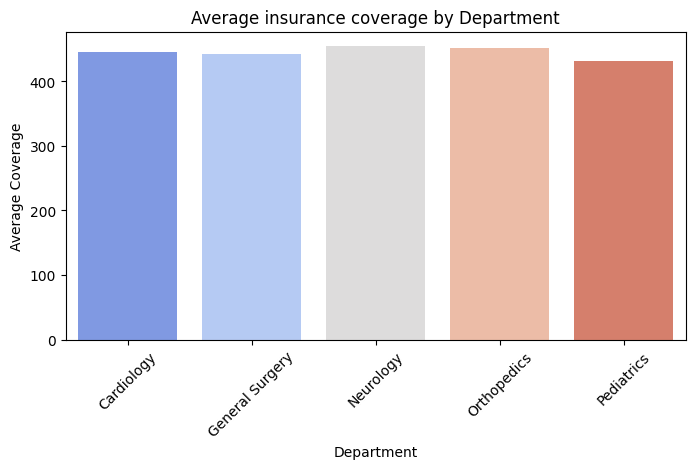

In [ ]:
department_df = all_sheets["departments"]
visits_df = all_sheets["visits"]
merged_df = visits_df.merge(department_df, on="Department ID", how="left")
avg_coverage = merged_df.groupby("Department")["Insurance Coverage"].mean().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=avg_coverage, x="Department", y="Insurance Coverage", palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Average insurance coverage by Department")
plt.xlabel("Department")
plt.ylabel("Average Coverage")
plt.show()


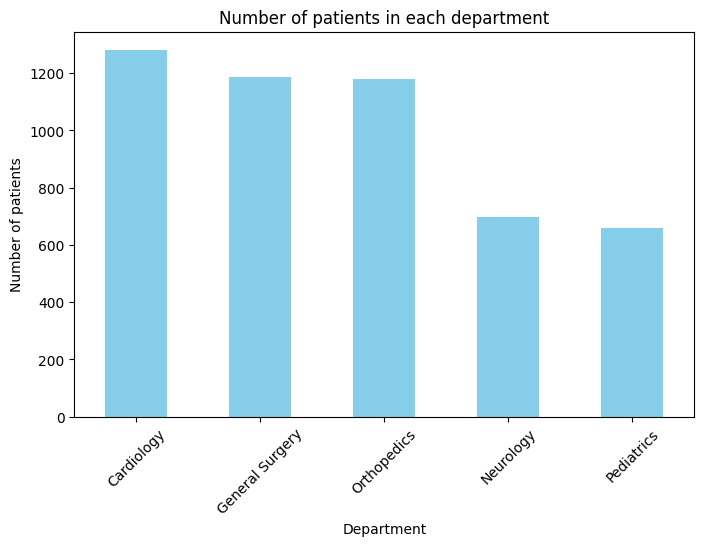

In [ ]:
departments_df = all_sheets["departments"]
visits_df = all_sheets["visits"]

merged_df = visits_df.merge(departments_df, on="Department ID", how="left")

department_counts = merged_df['Department'].value_counts()

plt.figure(figsize=(8,5))
department_counts.plot(kind='bar', color='skyblue')
plt.title("Number of patients in each department")
plt.xlabel("Department")
plt.ylabel("Number of patients")
translate = plt.xticks(rotation=45)
plt.show()


In [ ]:
department_df

,Department ID,Department
0,2,General Surgery
1,1,Cardiology
2,3,Neurology
3,5,Pediatrics
4,4,Orthopedics


/tmp/ipython-input-613963738.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Department ID", y="Patient Satisfaction Score", palette="Set2")


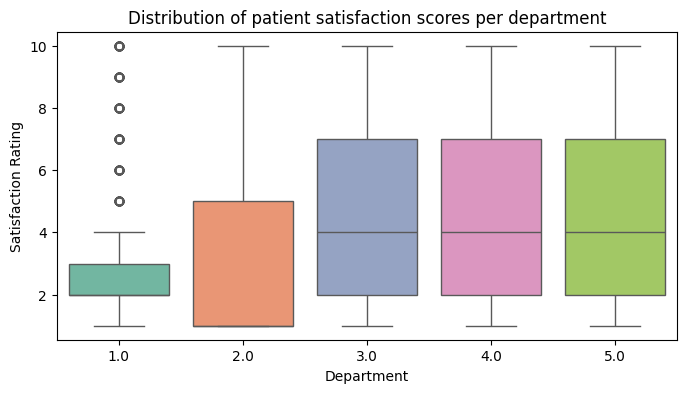

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="Department ID", y="Patient Satisfaction Score", palette="Set2")
plt.title("Distribution of patient satisfaction scores per department")
plt.xlabel("Department")
plt.ylabel("Satisfaction Rating")
plt.show()


In [ ]:
dept_counts = df["Department ID"].value_counts()
dept_counts

,count
Department ID,
1.0,1282
2.0,1186
4.0,1180
3.0,698
5.0,659


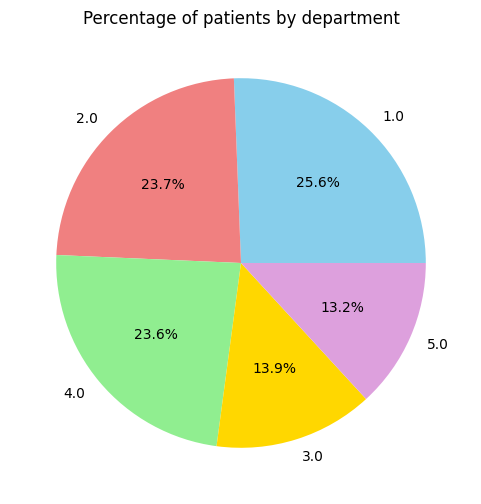

In [ ]:
plt.figure(figsize=(6,6))
Colors = ["skyblue", "lightcoral", "lightgreen", "gold", "plum"]
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%', colors=Colors)
plt.title("Percentage of patients by department")
plt.show()

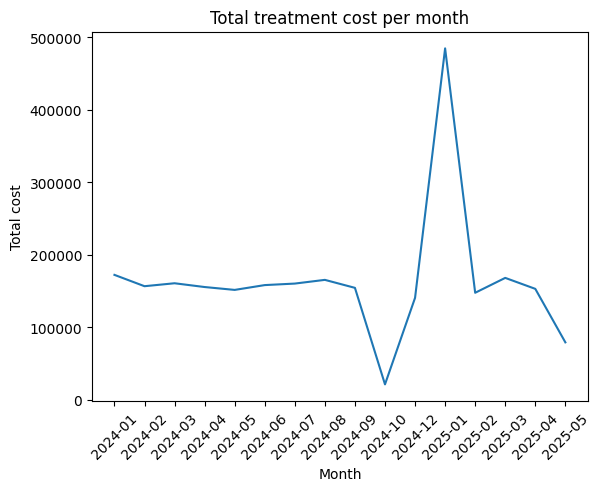

In [ ]:
df["Month"] = pd.to_datetime(df["Date of Visit"]).dt.to_period("M")

# حساب إجمالي تكلفة العلاج لكل شهر بدل المتوسط
monthly_df = df.groupby("Month")["Treatment Cost"].sum().reset_index()

monthly_df["Month"] = monthly_df["Month"].astype(str)

sns.lineplot(data=monthly_df, x="Month", y="Treatment Cost")
plt.xticks(rotation=45)
plt.title("Total treatment cost per month")
plt.xlabel("Month")
plt.ylabel("Total cost")
plt.show()


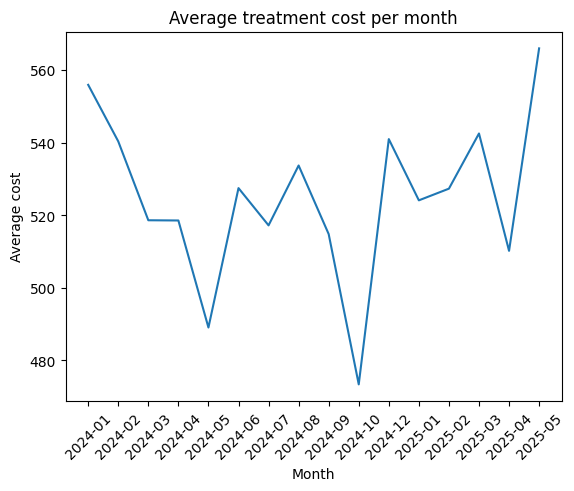

In [ ]:
df["Month"] = pd.to_datetime(df["Date of Visit"]).dt.to_period("M")
monthly_df = df.groupby("Month")["Treatment Cost"].mean().reset_index()
monthly_df["Month"] = monthly_df["Month"].astype(str)
sns.lineplot(data=monthly_df, x="Month", y="Treatment Cost")
plt.xticks(rotation=45)
plt.title("Average treatment cost per month")
plt.xlabel("Month")
plt.ylabel("Average cost")
plt.show()

/tmp/ipython-input-3140840671.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Service Type", y="Patient Satisfaction Score", palette="viridis")


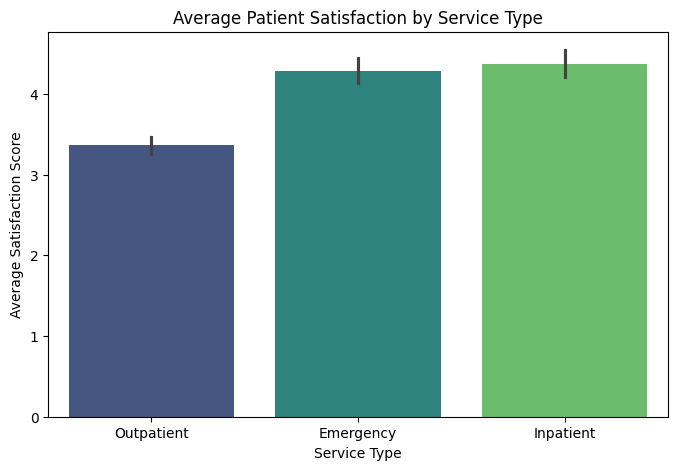

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Service Type", y="Patient Satisfaction Score", palette="viridis")
plt.title("Average Patient Satisfaction by Service Type")
plt.ylabel("Average Satisfaction Score")
plt.show()


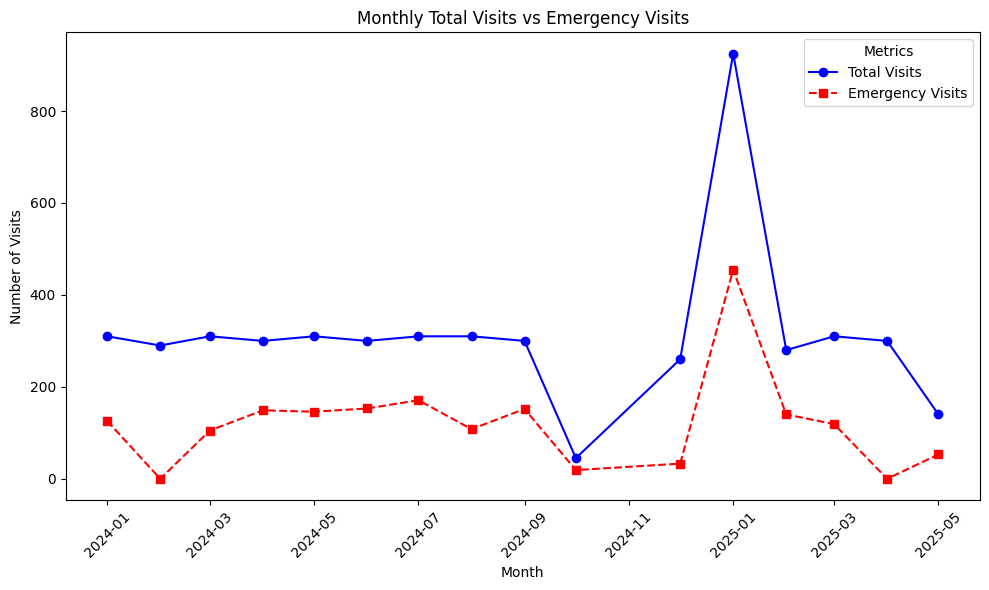

In [ ]:
df["Month"] = df["Date of Visit"].dt.to_period("M").dt.to_timestamp()

monthly_visits = df.groupby("Month").size().reset_index(name="Total Visits")

monthly_emergency = (
    df[df["Emergency Visit"].astype(str).str.strip().str.lower() == "yes"]
    .groupby("Month").size()
    .reset_index(name="Emergency Visits")
)

monthly_data = pd.merge(monthly_visits, monthly_emergency, on="Month", how="left").fillna(0)
monthly_data = monthly_data.sort_values("Month")

plt.figure(figsize=(10, 6))
plt.plot(monthly_data["Month"], monthly_data["Total Visits"], marker="o", color="blue", label="Total Visits")
plt.plot(monthly_data["Month"], monthly_data["Emergency Visits"], marker="s", linestyle="--", color="red", label="Emergency Visits")

plt.ylabel("Number of Visits")
plt.xlabel("Month")
plt.title("Monthly Total Visits vs Emergency Visits")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

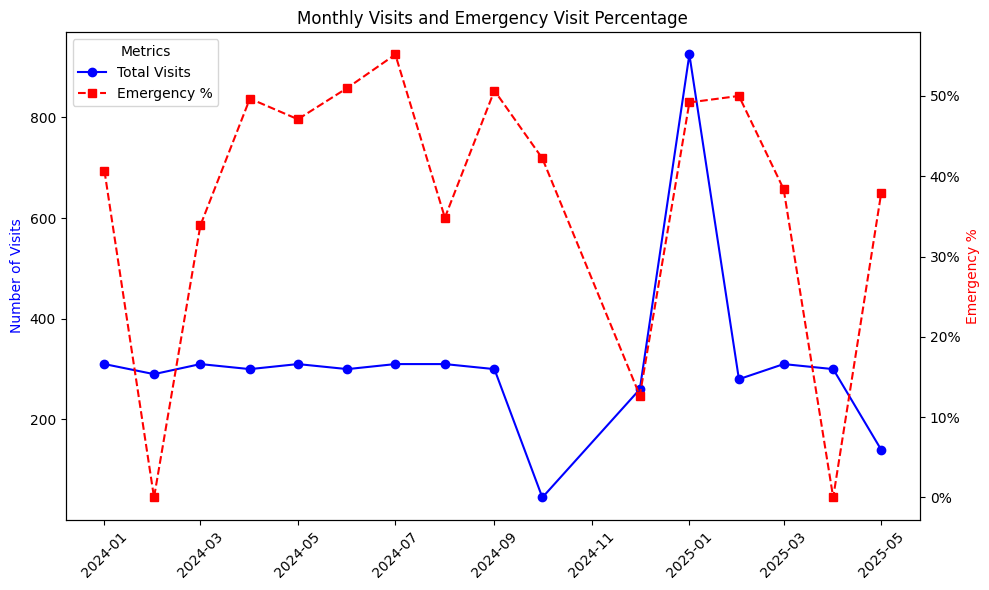

In [ ]:
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter

df["Emergency Visit"] = df["Emergency Visit"].astype(str).str.strip().str.lower()
df["Month"] = df["Date of Visit"].dt.to_period("M").dt.to_timestamp()

monthly_visits = df.groupby("Month").size().reset_index(name="Total Visits")
monthly_emergency = (df[df["Emergency Visit"] == "yes"]
                     .groupby("Month").size().reset_index(name="Emergency Visits"))

monthly_data = pd.merge(monthly_visits, monthly_emergency, on="Month", how="left").fillna(0)
monthly_data["Emergency %"] = (monthly_data["Emergency Visits"] / monthly_data["Total Visits"]) * 100
monthly_data = monthly_data.sort_values("Month")

fig, ax1 = plt.subplots(figsize=(10, 6))

line1, = ax1.plot(monthly_data["Month"], monthly_data["Total Visits"], marker="o", color="blue", label="Total Visits")
ax1.set_ylabel("Number of Visits", color="blue")
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xticks(rotation=45)

ax2 = ax1.twinx()
line2, = ax2.plot(monthly_data["Month"], monthly_data["Emergency %"], marker="s", linestyle="--", color="red", label="Emergency %")
ax2.set_ylabel("Emergency %", color="red")
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=100))

lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc="upper left", title="Metrics")

plt.title("Monthly Visits and Emergency Visit Percentage")
plt.tight_layout()
plt.show()

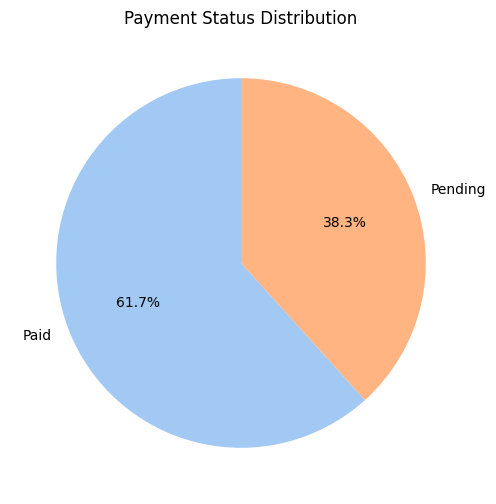

In [ ]:
plt.figure(figsize=(6, 6))
payment_counts = df["Payment Status"].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct="%1.1f%%",
        startangle=90, colors=sns.color_palette("pastel"))
plt.title("Payment Status Distribution")
plt.show()

In [ ]:
print(df["Emergency Visit"].unique())


['no' 'yes' 'nan']


/tmp/ipython-input-210178589.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emergency_counts.values, y=emergency_counts.index, palette="Reds_r")


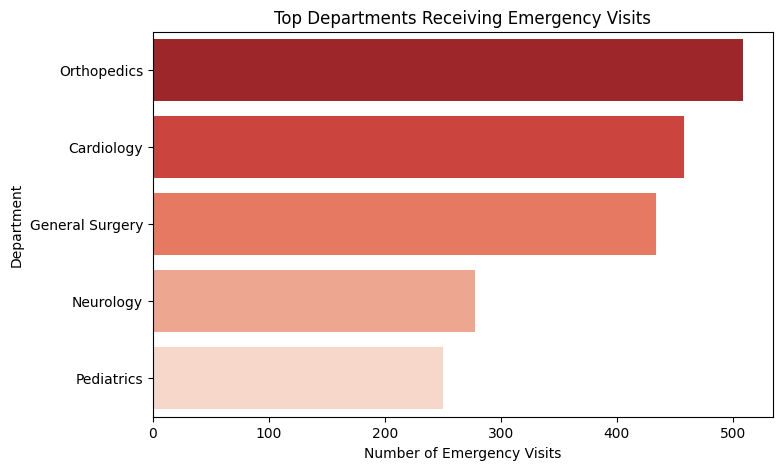

In [ ]:
visits = all_sheets["visits"]
departments = all_sheets["departments"]

visits_dept = visits.merge(departments, on="Department ID", how="left")

emergency_visits = visits_dept[visits_dept["Emergency Visit"] == "Yes"]

emergency_counts = emergency_visits["Department"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=emergency_counts.values, y=emergency_counts.index, palette="Reds_r")
plt.title("Top Departments Receiving Emergency Visits")
plt.xlabel("Number of Emergency Visits")
plt.ylabel("Department")
plt.show()



/tmp/ipython-input-2967872604.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=provider_patient_count, x="Patient ID", y="Provider Name", palette="Blues_r")


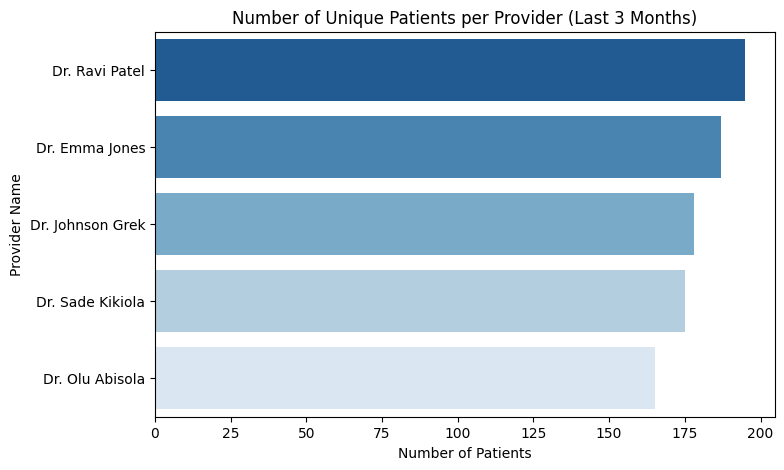

In [ ]:
providers = all_sheets["providers"]

visits["Date of Visit"] = pd.to_datetime(visits["Date of Visit"])

max_date = visits["Date of Visit"].max()

three_months_ago = max_date - pd.DateOffset(months=3)

last_3_months = visits[visits["Date of Visit"] >= three_months_ago]

last_3_months = last_3_months.merge(providers, on="Provider ID", how="left")

provider_patient_count = last_3_months.groupby("Provider Name")["Patient ID"].nunique().reset_index()
provider_patient_count = provider_patient_count.sort_values(by="Patient ID", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=provider_patient_count, x="Patient ID", y="Provider Name", palette="Blues_r")
plt.title("Number of Unique Patients per Provider (Last 3 Months)")
plt.xlabel("Number of Patients")
plt.ylabel("Provider Name")
plt.show()

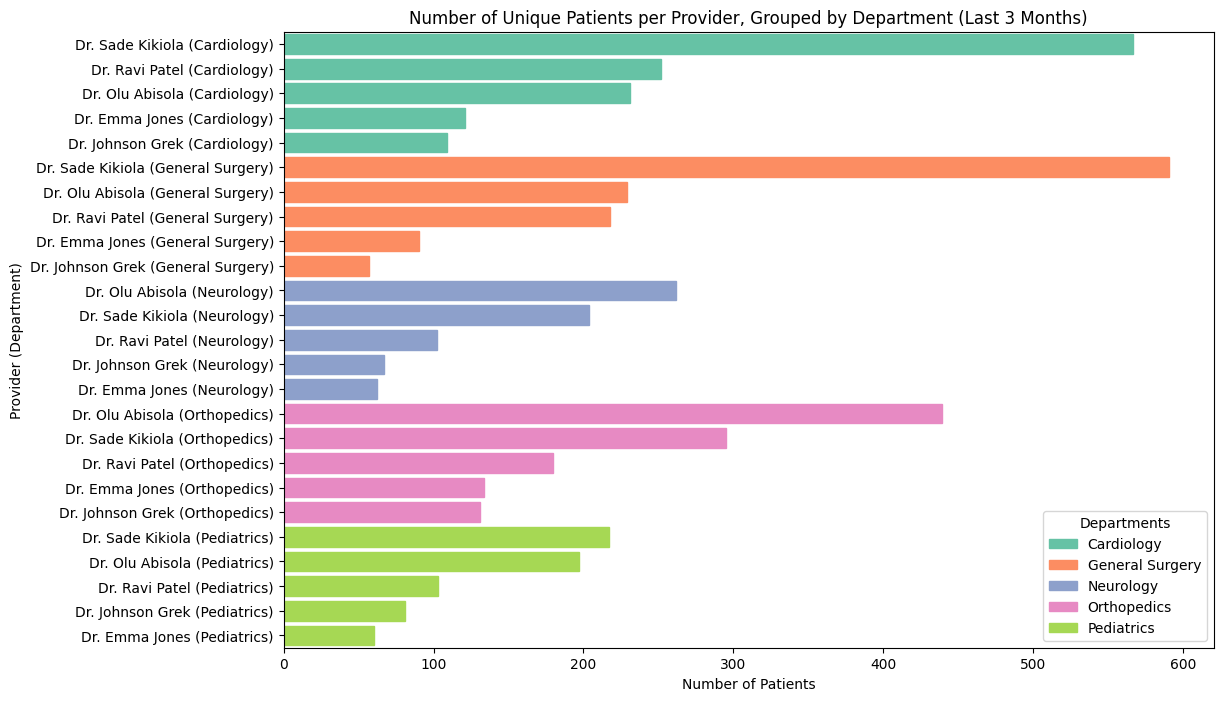

In [ ]:
provider_patient_count = provider_patient_count.sort_values(
    ["Department", "Patient ID"], ascending=[True, False]
)

departments = provider_patient_count["Department"].unique()
palette_dict = dict(zip(departments, sns.color_palette("Set2", len(departments))))

bar_colors = provider_patient_count["Department"].map(palette_dict).tolist()

plt.figure(figsize=(12, 8))
bars = sns.barplot(
    data=provider_patient_count,
    x="Patient ID",
    y="Provider & Dept",
    color=None
)

for bar, color in zip(bars.patches, bar_colors):
    bar.set_color(color)

plt.title("Number of Unique Patients per Provider, Grouped by Department (Last 3 Months)")
plt.xlabel("Number of Patients")
plt.ylabel("Provider (Department)")

handles = [plt.Rectangle((0,0),1,1, color=palette_dict[dept]) for dept in palette_dict]
plt.legend(handles, palette_dict.keys(), title="Departments")

plt.show()


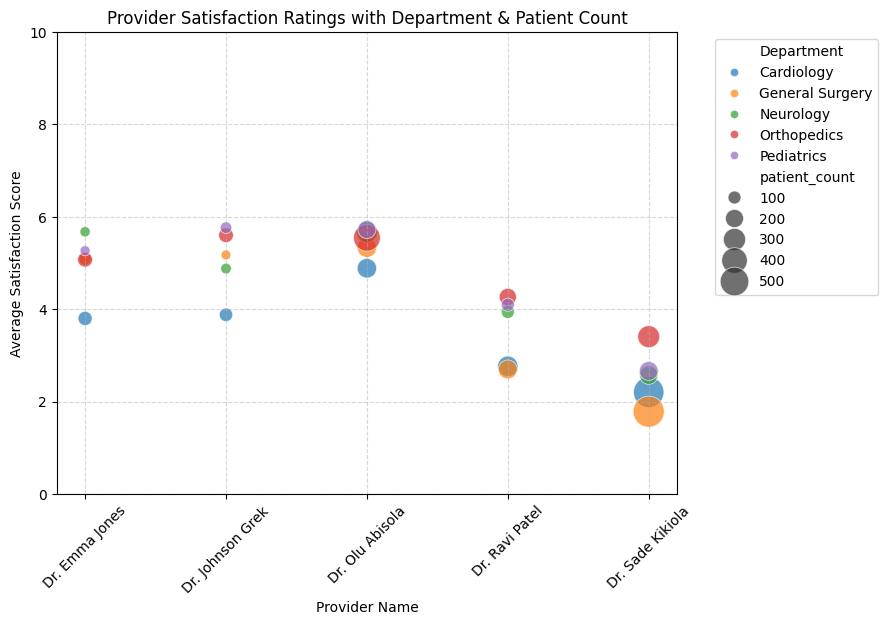

In [ ]:
departments = all_sheets["departments"]
merged_data = visits.merge(providers, on="Provider ID") \
                    .merge(departments, on="Department ID")

provider_rating = merged_data.groupby(["Provider Name", "Department"]) \
    .agg(avg_rating=("Patient Satisfaction Score", "mean"),
         patient_count=("Patient ID", "nunique")) \
    .reset_index()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=provider_rating,
    x="Provider Name",
    y="avg_rating",
    hue="Department",
    size="patient_count",
    sizes=(50, 500),
    alpha=0.7
)

plt.xticks(rotation=90)
plt.title("Provider Satisfaction Ratings with Department & Patient Count")
plt.xlabel("Provider Name")
plt.ylabel("Average Satisfaction Score")
plt.ylim(0, 10)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle="--", alpha=0.5)
translate = plt.xticks(rotation=45)
plt.show()

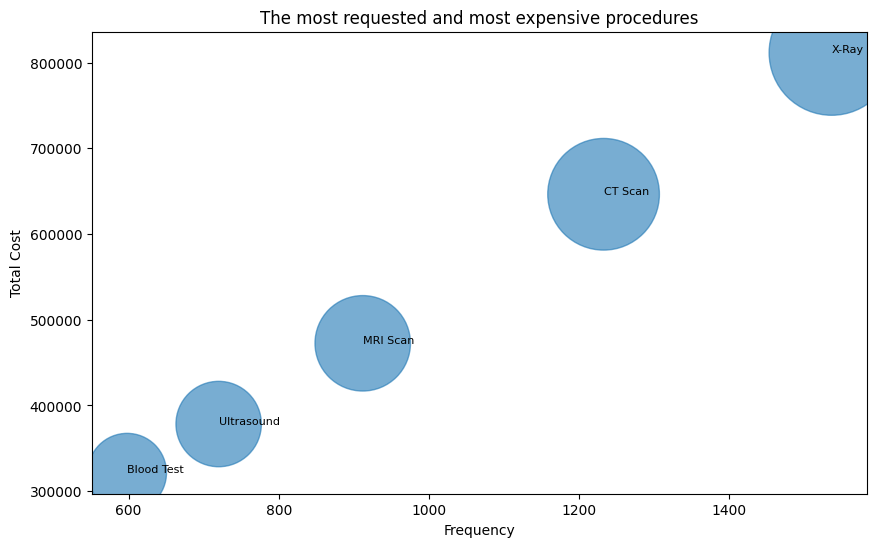

In [ ]:
procedures = all_sheets['procedures']

proc_data = visits.merge(procedures, on="Procedure ID")

proc_summary = proc_data.groupby("Procedure").agg(
    Frequency=("Procedure", "count"),
    TotalCost=("Treatment Cost", "sum")
).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(
    proc_summary["Frequency"],
    proc_summary["TotalCost"],
    s=proc_summary["TotalCost"] / 100,
    alpha=0.6
)

for i, row in proc_summary.iterrows():
    plt.text(row["Frequency"], row["TotalCost"], row["Procedure"], fontsize=8)

plt.xlabel("Frequency")
plt.ylabel("Total Cost")
plt.title("The most requested and most expensive procedures")
plt.show()
